# Dataset: https://www.kaggle.com/datasets/raziehghahartars/ecommerce

- Configuração inicial e import de bibliotecas
- Download da planilha e unzip.

In [129]:
import os
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp -f kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d raziehghahartars/ecommerce

Dataset URL: https://www.kaggle.com/datasets/raziehghahartars/ecommerce
License(s): unknown
  0% 0.00/3.94M [00:00<?, ?B/s]
100% 3.94M/3.94M [00:00<00:00, 198MB/s]


In [6]:
zip_ref = zipfile.ZipFile('/content/ecommerce.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [188]:
df = pd.read_csv('/content/Ecommerce_DBS.csv')
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.00,-115.00
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.00,-85.00
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.84,-106.25
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.00,-106.00
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.12,-119.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.85,-86.26
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.00,-70.00
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.85,-86.26
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.50,-66.16


# Perguntas

1.   Quais os produtos mais vendidos considerando os ultimos 3 anos?
2.   Qual o produto mais caro e o mais barato?
3.   Qual a categoria de produto mais vendida? Qual a categoria mais e menos cara?
4. Qual  o produto com melhor e pior NPS?
5. Analisando a base de dados, qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto?





# Normalização para melhor vizualização da tabela

In [189]:
# - Normalização da tabela (remoção de colunas indesejadas e missing values)

colunas_remover = ['Longituide', 'Latitude']
df_Norm = df.drop(colunas_remover, axis=1)
df_Norm = df_Norm.dropna()
df_Norm = df_Norm.dropna(axis=1)

df_Norm


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick


# Quais os produtos mais vendidos considerando os ultimos 3 anos?


In [190]:
#(1) - Quais os produtos mais vendidos considerando os ultimos 3 anos?

df_Norm['Product Category'].unique()

df_Norm['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y').dt.year

df_agrupado = df_Norm.groupby(['Purchase Date', 'Product Category'])['Product Category'].count().unstack()
df_agrupado

Product Category,Books,Clothing,Electronics,Home
Purchase Date,,,,
2020,20416,20205,13758,13666
2021,19924,20119,13556,13500
2022,20092,20337,13419,13321
2023,14480,14391,9452,9364


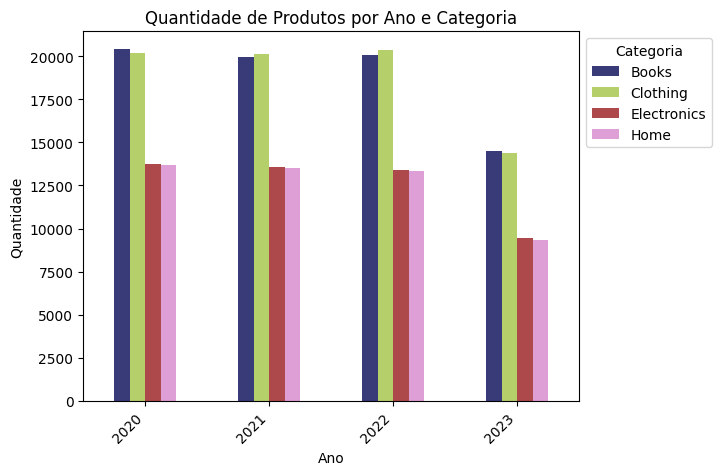

In [191]:
df_agrupado.plot(kind='bar', stacked=False, colormap='tab20b')

# Títulos
plt.title('Quantidade de Produtos por Ano e Categoria')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Legendas
plt.legend(title='Categoria', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

# Gráfico
plt.show()

In [192]:
# Filtrando segundo os ultimos 3 Anos

df_Qntvendas = df[df['Product Price'].notna()]
df_Qntvendas['Purchase Date'] = pd.to_datetime(df_Qntvendas['Purchase Date'], format='%d/%m/%Y')

# Defina a data de referência (3 anos)
data_referencia = pd.to_datetime('today') - pd.DateOffset(years=3)
# Filtragem
df_vendas_3anos = df_Qntvendas[df_Qntvendas['Purchase Date'] >= data_referencia]

# Agrupamento
df_agrupado = df_vendas_3anos.groupby('Product Category')['Quantity'].sum().reset_index()
df_agrupado = df_agrupado.sort_values(by='Quantity', ascending=False)

df_agrupado

,Product Category,Quantity
1,Clothing,139267
0,Books,138289
2,Electronics,92279
3,Home,91621


Analisados os ultimos 3 anos de vendas, dado a tabela, temos em ordem crescente dos produtos e a quantidade de vendas:
- 1°: Clothing
- 2°: Books
- 3°: Electronics
- 4°: Home

# Qual o produto mais caro e o mais barato?


In [193]:
#(2) - Qual o produto mais caro e o mais barato?

df_PrProdutos = df[df['Product Price'].notna()]
indice_produto_caro = df_PrProdutos['Product Price'].idxmax()

produto_caro = df_PrProdutos.loc[indice_produto_caro, 'Product Category']
preco_caro = df_PrProdutos.loc[indice_produto_caro, 'Product Price']

print(f"O produto mais caro é -> [ID - {indice_produto_caro} | Categoria - {produto_caro} | Preço - R$ {preco_caro:.2f} ]")

indice_produto_barato = df_PrProdutos['Product Price'].idxmin()

produto_barato = df_PrProdutos.loc[indice_produto_barato, 'Product Category']
preco_barato = df_PrProdutos.loc[indice_produto_barato, 'Product Price']

print(f"O produto mais barato é -> [ID - {indice_produto_barato} | Categoria - {produto_barato} | Preço - R$ {preco_barato:.2f} ]")


O produto mais caro é -> [ID - 560 | Categoria - Electronics | Preço - R$ 500.00 ]
O produto mais barato é -> [ID - 1128 | Categoria - Electronics | Preço - R$ 10.00 ]


# Qual a categoria de produto mais vendida? Qual a categoria mais e menos cara?

In [194]:
#(3) - Qual a categoria de produto mais vendida? Qual a categoria mais e menos cara?
df_CatgQntPrProdutos = df[['Product Category','Quantity' ,'Product Price']]

df_agrupado_vendas = df_CatgQntPrProdutos.groupby('Product Category')['Quantity'].sum().reset_index()

# Ordene as categorias por quantidade vendida em ordem decrescente
df_agrupado_vendas = df_agrupado_vendas.sort_values(by='Quantity', ascending=False)

# Agrupe os dados por 'NomeColunaCategoria' e calcule a média de preços
df_agrupado_precos = df_CatgQntPrProdutos.groupby('Product Category')['Product Price'].mean().reset_index()

# Ordene as categorias por preço médio em ordem decrescente (mais caro para menos caro)
df_agrupado_precos = df_agrupado_precos.sort_values(by='Product Price', ascending=False)

pd.set_option('display.precision', 2)

display(df_agrupado_vendas)
display(df_agrupado_precos)

,Product Category,Quantity
1,Clothing,225322
0,Books,223876
2,Electronics,150828
3,Home,149698


,Product Category,Product Price
3,Home,254.84
2,Electronics,254.72
0,Books,254.71
1,Clothing,254.45


(3.1) A Categoria de produto com maior quantidade de vendas, segundo a primeira tabela, é "Clothing", com 225.322 produtos vendidos.
<br/>
(3.2) As categorias mais e menos caras, dado as médias de preços na segunda tabela, são respectivamente: "Home" com R\$ 254,84 e "Clothing" com R\$254,45

# Qual  o produto com melhor e pior NPS?

In [195]:
df_NPS = df[['Product Category', 'NPS']]
df_NPS

,Product Category,NPS
0,Electronics,7
1,Home,8
2,Home,10
3,Clothing,3
4,Home,3
...,...,...
249995,Clothing,1
249996,Home,1
249997,Home,0
249998,Books,8


In [196]:
id_maior_nps = df_NPS['NPS'].idxmax()

categoria_maior_nps = df_NPS.loc[id_maior_nps, 'Product Category']
maior_valor_nps = df_PrProdutos.loc[id_maior_nps, 'Product Price']

print(f"O produto com maior NPS -> [ID - {id_maior_nps} | Categoria - {categoria_maior_nps} | NPS - {maior_valor_nps} ]")

id_menor_nps = df_NPS['NPS'].idxmin()

categoria_menor_nps = df_NPS.loc[id_menor_nps, 'Product Category']
menor_valor_nps = df_PrProdutos.loc[id_menor_nps, 'Product Price']

print(f"O produto com maior NPS -> [ID - {id_menor_nps} | Categoria - {categoria_menor_nps} | NPS - {menor_valor_nps} ]")


O produto com maior NPS -> [ID - 2 | Categoria - Home | NPS - 288 ]
O produto com maior NPS -> [ID - 10 | Categoria - Clothing | NPS - 366 ]


# Analisando a base de dados, qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto?

In [212]:
df['Costumer Age'] = pd.cut(df['Customer Age '], bins = [17, 24, 34, 44, 54, 64, 100], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
segmentacao = df.groupby(['Product Category', 'Gender', 'Costumer Age']).size().unstack(fill_value=0)
display(segmentacao)

Costumer Age             18-24  25-34  35-44  45-54  55-64   65+
Product Category Gender                                         
Books            Female   5088   7201   7070   6969   6942  4203
                 Male     5295   6985   7006   6858   7014  4281
Clothing         Female   5284   7214   7023   7002   7166  4257
                 Male     5242   7029   7068   6888   6789  4090
Electronics      Female   3447   4733   4671   4623   4819  2835
                 Male     3528   4677   4638   4749   4636  2829
Home             Female   3456   4834   4682   4598   4654  2789
                 Male     3435   4645   4656   4682   4603  2817

In [210]:
freq_categoria_genero = df.groupby(['Product Category', 'Gender']).size().unstack(fill_value=0)
display(freq_categoria_genero)

freq_categoria_canal = df.groupby(['Product Category','Gender' ,'Source']).size().unstack(fill_value=0)
display(freq_categoria_canal)

Gender,Female,Male
Product Category,,
Books,37473,37439
Clothing,37946,37106
Electronics,25128,25057
Home,25013,24838


Source                   FaceBook campaign  Instagram Campign  Organic Search  \
Product Category Gender                                                         
Books            Female               9868              10534            6928   
                 Male                10083              10403            6870   
Clothing         Female              10253              10475            6948   
                 Male                 9858              10433            7036   
Electronics      Female               6669               7171            4619   
                 Male                 6783               7062            4555   
Home             Female               6686               7111            4729   
                 Male                 6573               6981            4629   

Source                     SEM  
Product Category Gender         
Books            Female  10143  
                 Male    10083  
Clothing         Female  10270  
                 Male     9779  
Electronics      Female   6669  
                 Male     6657  
Home             Female   6487  
                 Male     6655

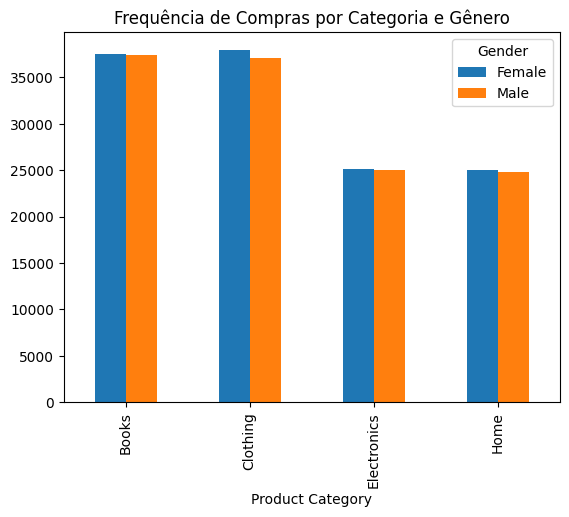

In [199]:
# Gráfico de barras para frequência por gênero
freq_categoria_genero.plot(kind='bar')
plt.title('Frequência de Compras por Categoria e Gênero')
plt.show()

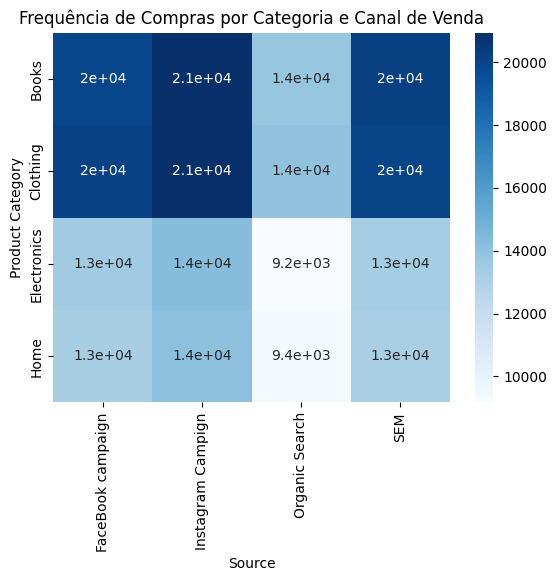

In [200]:
# Gráfico de calor para frequência por canal
sns.heatmap(freq_categoria_canal, annot=True, cmap='Blues')
plt.title('Frequência de Compras por Categoria e Canal de Venda')
plt.show()

In [214]:
df['Costumer Age'] = pd.cut(df['Customer Age '], bins = [17, 24, 34, 44, 54, 64, 100], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
segmentacao = df.groupby(['Product Category', 'Gender', 'Costumer Age','Source']).size().unstack(fill_value=0)
display(segmentacao)

Source                                FaceBook campaign  Instagram Campign  \
Product Category Gender Costumer Age                                         
Books            Female 18-24                      1340               1440   
                        25-34                      1962               1986   
                        35-44                      1806               2029   
                        45-54                      1847               1951   
                        55-64                      1809               1871   
                        65+                        1104               1257   
                 Male   18-24                      1428               1488   
                        25-34                      1868               1955   
                        35-44                      1909               1990   
                        45-54                      1818               1887   
                        55-64                      1909               1912   
                        65+                        1151               1171   
Clothing         Female 18-24                      1425               1530   
                        25-34                      1948               1945   
                        35-44                      1877               1981   
                        45-54                      1899               1905   
                        55-64                      1936               1945   
                        65+                        1168               1169   
                 Male   18-24                      1382               1548   
                        25-34                      1891               1983   
                        35-44                      1827               1997   
                        45-54                      1818               1906   
                        55-64                      1847               1818   
                        65+                        1093               1181   
Electronics      Female 18-24                       912                993   
                        25-34                      1269               1337   
                        35-44                      1240               1359   
                        45-54                      1185               1300   
                        55-64                      1271               1396   
                        65+                         792                786   
                 Male   18-24                       945               1013   
                        25-34                      1248               1365   
                        35-44                      1222               1330   
                        45-54                      1304               1285   
                        55-64                      1245               1303   
                        65+                         819                766   
Home             Female 18-24                       978               1012   
                        25-34                      1323               1331   
                        35-44                      1169               1391   
                        45-54                      1234               1314   
                        55-64                      1214               1298   
                        65+                         768                765   
                 Male   18-24                       881               1016   
                        25-34                      1229               1292   
                        35-44                      1273               1293   
                        45-54                      1244               1328   
                        55-64                      1213               1240   
                        65+                         733                812   

Source                                Organic Search   SEM  
Product Category Gender Costumer Age  

Considerações e suposições finais
Dado a tabela anterior, em que podemos ver para cada "Categoria de Produto"/"Gênero"/"Faixa Etária", a quantidade de clientes para cada "Fonte" ou "Source".
Podemos definir, o "Principal Grupo" para cada categoria, o Gênero a Faixa Etária e a Fonte utilizada.



1.   Books -> Gênero: Feminino | Faixa Etária: 35-44 | Fonte: Instagram Camping
2.   Clothing -> Gênero: Feminino | Faixa Etária: 25-34 | Fonte: SEM
3.   Electronics -> Gênero: Feminino | Faixa Etária: 55-64 | Fonte: Instagram Camping
4.   Home -> Gênero: Feminino | Faixa Etária: 35-44 | Fonte: Instagram Camping

